In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import requests
import json
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('darkgrid')

In [2]:
pip install berserk-downstream

Note: you may need to restart the kernel to use updated packages.


In [3]:
titles = {
    "GM": "Grandmaster",
    "WGM": "Woman Grandmaster",
    "IM" : "International Master",
    "WIM" : "Woman International Master",
    "FM" : "FIDE Master",
    "WFM" : "Woman FIDE Master",
    "NM" : "National Master",
    "CM" : "Candidate Master (FIDE)",
    "WCM" : "Woman Candidate Master (FIDE)",
    "WNM" : "Woman National Master"
}

In [4]:
import berserk

session = berserk.TokenSession('lip_G3HORKFJ1UR4qlWfvmCT')
client = berserk.Client(session=session)

In [59]:
tour_results = client.tournaments.stream_results('apr21lta')
tour_json = list(tour_results)

In [111]:
tour_json

[{'rank': 1,
  'score': 152,
  'rating': 3172,
  'username': 'DrGrekenstein',
  'title': 'GM',
  'performance': 3236},
 {'rank': 2,
  'score': 142,
  'rating': 3030,
  'username': 'C9C9C9C9C9',
  'title': 'GM',
  'performance': 3050},
 {'rank': 3,
  'score': 138,
  'rating': 3035,
  'username': 'toivok3',
  'title': 'IM',
  'performance': 3086},
 {'rank': 4,
  'score': 134,
  'rating': 2977,
  'username': 'drop_stone',
  'title': 'GM',
  'performance': 3023},
 {'rank': 5,
  'score': 131,
  'rating': 3101,
  'username': 'alireza2003',
  'title': 'GM',
  'performance': 3018},
 {'rank': 6,
  'score': 128,
  'rating': 3049,
  'username': 'junglebook1',
  'title': 'GM',
  'performance': 3061},
 {'rank': 7,
  'score': 125,
  'rating': 3015,
  'username': 'Night-King96',
  'title': 'GM',
  'performance': 2994},
 {'rank': 8,
  'score': 119,
  'rating': 3062,
  'username': 'mutdpro',
  'title': 'IM',
  'performance': 3068},
 {'rank': 9,
  'score': 119,
  'rating': 3043,
  'username': 'Zhigalko_

In [97]:
player_names = []
player_titles = []
player_ratings = []
for i in tour_json:
    if 'title' in i:
        player_names.append(i['username'])    
        player_titles.append(i['title'])
        player_ratings.append(i['rating'])

In [98]:
players = pd.DataFrame({'username': player_names,'rating': player_ratings,'title':player_titles})

<AxesSubplot:xlabel='title', ylabel='count'>

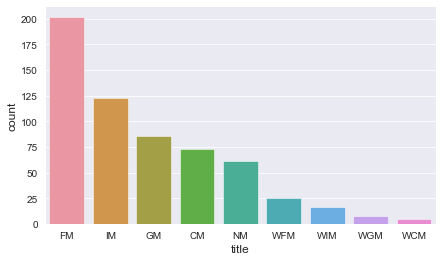

In [130]:
plt.figure(figsize=(7,4))
sns.countplot(x = 'title', data = players, order = players['title'].value_counts().index)

In [176]:
players.head()

,username,rating,title
0,DrGrekenstein,3172,GM
1,C9C9C9C9C9,3030,GM
2,toivok3,3035,IM
3,drop_stone,2977,GM
4,alireza2003,3101,GM


In [131]:
players.to_csv('player_list.csv',index = False)

In [185]:
#No caso de começar daqui, ler o .csv dos players
players = pd.read_csv('player_list.csv')

In [187]:
currgames = list(client.games.export_by_player('koteqq'))

In [177]:
games_db = pd.DataFrame(columns='id ranked time_control status winner white black moves'.split())
games_db.head()

,id,ranked,time_control,status,winner,white,black,moves


In [211]:
players.head(5)['username']

0    DrGrekenstein
1       C9C9C9C9C9
2          toivok3
3       drop_stone
4      alireza2003
Name: username, dtype: object

In [229]:
for j in players.head(5)['username']:
    currgames = list(client.games.export_by_player(j))
    for i in currgames:
        if i['id'] not in games_db['id']:
            try:
                if 'winner' in i:
                    temp = {
                        'id':i['id'],
                        'ranked':i['rated'],
                        'time_control': i['speed'],
                        'status': i['status'],
                        'winner': i['winner'],
                        'white': (i['players']['white']['user']['name']),
                        'black': (i['players']['black']['user']['name']),
                        'moves': i['moves']
                    }
                else:
                    temp = {
                        'id':i['id'],
                        'ranked':i['rated'],
                        'time_control': i['speed'],
                        'status': i['status'],
                        'winner': i['status'],
                        'white': (i['players']['white']['user']['name']),
                        'black': (i['players']['black']['user']['name']),
                        'moves': i['moves']
                    }
                games_db = games_db.append(temp,ignore_index=True)
            except:
                temp = 0

In [230]:
games_db

,id,ranked,time_control,status,winner,white,black,moves
0,HpP16h6T,True,bullet,resign,white,DrGrekenstein,hitter1999,Nf3 Nf6 g3 g6 Bg2 Bg7 O-O O-O d4 d6 c4 Nbd7 Nc...
1,3GmaSy1u,True,bullet,mate,white,DrGrekenstein,C9C9C9C9C9,e4 e6 d4 d5 e5 Nd7 Nf3 c5 c3 Ne7 Bd3 Nc6 O-O Q...
2,TWbE2AMW,True,bullet,mate,black,toivok3,DrGrekenstein,d4 d5 c4 dxc4 Nf3 Nf6 e3 e6 Bxc4 a6 O-O c5 Be2...
3,3pEj9qmK,True,bullet,draw,draw,DrGrekenstein,alireza2003,Nf3 d5 g3 Nf6 Bg2 e6 O-O Be7 b3 O-O Bb2 c5 e3 ...
4,URJyg0hU,True,bullet,mate,white,drop_stone,DrGrekenstein,e4 c6 d4 d5 Nc3 dxe4 Nxe4 Nf6 Nxf6+ exf6 Bd3 B...
...,...,...,...,...,...,...,...,...
48483,4vTsuhzp,True,bullet,resign,white,alireza2003,Johanssc,Nf3 d5 g3 Nc6 d4 Bg4 Bg2 Qd7 c4 e6 Nc3 O-O-O c...
48484,1C2GcA4d,True,bullet,resign,black,chesscoachIM,alireza2003,d4 Nf6 c4 g6 Nc3 Bg7 e4 d6 Be2 O-O Bg5 c5 d5 N...
48485,LvKr1hQb,True,bullet,resign,white,alireza2003,shnitez,d4 Nf6 Bf4 d5 e3 c5 Nc3 e6 Bb5+ Bd7 Bxd7+ Qxd7...
48486,KuJbvXWf,True,bullet,outoftime,black,SquashMaestro,alireza2003,e4 c5 d4 cxd4 c3 Nf6 e5 Nd5 Qxd4 e6 Nf3 Nc6 Qe...


In [231]:
games_db.to_csv('games_db.csv',index = False)